In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [134]:
train_data = pd.read_csv('Project2_Train.csv')
test_data = pd.read_csv('Project2_Test.csv')
test_data = test_data.rename({'Damage': 'VehicleDamage'}, axis=1)

# np.unique(train_data['Response'], return_counts = True)
# combined = pd.concat([train_data, test_data], ignore_index = True)

# set_train_indices = set(np.random.choice(range(0, 20000), size=10000, replace=False, p=None))
# train_indices = [i in set_train_indices for i in range(20000)]
# test_indices = [i not in set_train_indices for i in range(20000)]

# train_data = combined[train_indices].reset_index()
# test_data = combined[test_indices].reset_index()

In [135]:
def preprocess(data, oneHotEncodedCategories, drop_mystery):
    return_data = data.copy()
    for cat in oneHotEncodedCategories:
        encoder = OneHotEncoder()
        encoder_df = pd.DataFrame(encoder.fit_transform(return_data[[cat]]).toarray())
        encoder_df.columns = [cat + " " + name.split('_', 1)[1] for name in encoder.get_feature_names()]
        return_data = return_data.join(encoder_df)
        return_data.drop(cat, axis = 1, inplace = True)
    if drop_mystery:
        return_data.drop('Mystery', axis = 1, inplace = True)
    return return_data

In [232]:
# X_train_before = train_data[['Gender', 'Age', 'Region_Code', 'Age.1', 'VehicleDamage', 'Premium', 'Vintage', 'Mystery']]
# y_train_val = train_data['Response']
# X_test_before = test_data[['Gender', 'Age', 'Region_Code', 'Age.1', 'VehicleDamage', 'Premium', 'Vintage', 'Mystery']]
# y_test = test_data['Response']

# X_train_val = preprocess(X_train_before, ['Gender', 'Region_Code', 'VehicleDamage', 'Age.1'], True)
# X_test = preprocess(X_test_before, ['Gender', 'Region_Code', 'VehicleDamage', 'Age.1'], True)

# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1)

X_train_before = train_data[['Gender', 'Age', 'Region_Code', 'Age.1', 'VehicleDamage', 'Premium', 'Vintage', 'Mystery']]
y_train = train_data['Response']
X_test_before = test_data[['Gender', 'Age', 'Region_Code', 'Age.1', 'VehicleDamage', 'Premium', 'Vintage', 'Mystery']]
y_test = test_data['Response']

# print(np.unique(X_train_before['Age.1']))

X_train = preprocess(X_train_before, ['Gender', 'Region_Code', 'VehicleDamage', 'Age.1'], True)
X_test = preprocess(X_test_before, ['Gender', 'Region_Code', 'VehicleDamage', 'Age.1'], True)

# X_train_before = train_data[['VehicleDamage', 'Mystery']]
# X_test_before = test_data[['VehicleDamage', 'Mystery']]

# X_train = preprocess(X_train_before, ['VehicleDamage'], True)
# X_train = X_train[['VehicleDamage Yes']]
# X_test = preprocess(X_test_before, ['VehicleDamage'], True)
# X_test = X_test[['VehicleDamage Yes']]

# print(X_test)

# temp = X_train
# X_train = X_test
# X_test = temp

# temp = y_train
# y_train = y_test
# y_test = temp

# X_train = X_train[['Age', 'Premium', 'Vintage']]
# X_test = X_test[['Age', 'Premium', 'Vintage']]
# print(X_train)
# print(y_train)

(array([ 0.,  1., 10., 11.]), array([4862,   22, 3812, 1304], dtype=int64))


(array([4862.,   22.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3812., 1304.]),
 array([ 0.  ,  0.55,  1.1 ,  1.65,  2.2 ,  2.75,  3.3 ,  3.85,  4.4 ,
         4.95,  5.5 ,  6.05,  6.6 ,  7.15,  7.7 ,  8.25,  8.8 ,  9.35,
         9.9 , 10.45, 11.  ]),
 <a list of 20 Patch objects>)

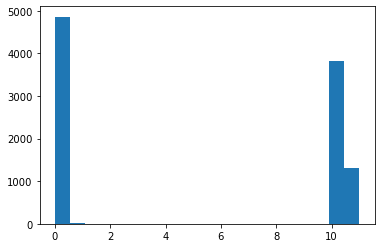

In [124]:
# Logistic Regression, Classification Tree, Extra Tree, Bagging, Gradient Boosting
x = X_train['VehicleDamage Yes']
pair = [x * 10 + y for x, y in list(zip(x, y_train))]
print(np.unique(np.array(pair), return_counts = True))
# print(len(list(zip(x, y_train))))
# print(pair)

plt.hist(pair, bins=20)

(array([ 0.,  1., 10., 11.]), array([4773,   23, 3863, 1341], dtype=int64))


(array([4773.,   23.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3863., 1341.]),
 array([ 0.  ,  0.55,  1.1 ,  1.65,  2.2 ,  2.75,  3.3 ,  3.85,  4.4 ,
         4.95,  5.5 ,  6.05,  6.6 ,  7.15,  7.7 ,  8.25,  8.8 ,  9.35,
         9.9 , 10.45, 11.  ]),
 <a list of 20 Patch objects>)

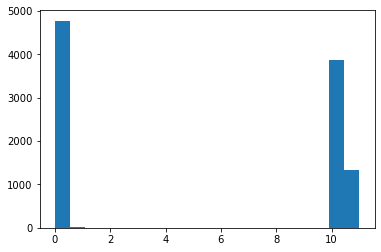

In [125]:
x = X_test['VehicleDamage Yes']
pair = [x * 10 + y for x, y in list(zip(x, y_test))]
print(np.unique(np.array(pair), return_counts = True))
# print(len(list(zip(x, y_train))))
# print(pair)

plt.hist(pair, bins=20)

In [ ]:
def train_one_model(estimator, param_grid):
    grid_rf_class = GridSearchCV(
        estimator = estimator,
        param_grid = param_grid,
        scoring = 'roc_auc',
        n_jobs = 3,
        cv = 3,
        refit = True,
        return_train_score = True
    )
    
    grid_rf_class.fit(X_train, y_train)
    
#     print(grid_rf_class.cv_results_)
    
#     fig = plt.figure(figsize=(25,20))
#     _ = tree.plot_tree(grid_rf_class.best_estimator_, 
#                        feature_names=X_train.columns,
#                        filled=True)

    return (grid_rf_class.best_score_, grid_rf_class.best_params_, grid_rf_class.best_estimator_)

In [18]:
estimator_names = ["Logistic Regression", "Decision Tree", "Adaboost", "Random Forest", "Gradient Boost"]
estimators = [LogisticRegression(), DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

param_grids = [{}, 
               {
                   'max_leaf_nodes': [2, 5, 10, 20, 50]
               },
               {
                   'n_estimators': [10, 50, 100],
               },
               {},
               {
                   'learning_rate': [0.01, 0.05, 0.1, 0.2],
                   'n_estimators': [40, 55, 70, 100],
                   'max_depth': [2, 4, 7, 10]
               }
              ]

for i in range(0, len(estimators)):
    print('--------------------------')
    best_score, best_params, best_estimator = train_one_model(estimators[i], param_grids[i])
#     best_score = best_estimator.fit(X_train, y_train)
    y_pred_train = best_estimator.predict(X_train)
    best_score = roc_auc_score(y_train, y_pred_train)
    
    print(estimator_names[i])
    print(best_score)
    print(best_params)
    
    y_pred = best_estimator.predict(X_test)

    print(roc_auc_score(y_test, y_pred))
    print('--------------------------')
    


# print(best_score)
# print(best_params)

# y_pred = best_estimator.predict(X_test)

# roc_auc_score(y_test, y_pred)

--------------------------
yeboi1
yeboi2
Logistic Regression
0.5051876570851466
{}
0.5050151517415334
--------------------------
--------------------------
yeboi1
yeboi2
Decision Tree
0.507546260021541
{'max_leaf_nodes': 10}
0.5023340541333489
--------------------------
--------------------------
yeboi1
yeboi2
Adaboost
0.5102794155032758
{'n_estimators': 50}
0.5081796313325248
--------------------------
--------------------------
yeboi1
yeboi2
Random Forest
1.0
{}
0.5439434461756625
--------------------------
--------------------------


KeyboardInterrupt: 

In [482]:
# # lg = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth = 50, min_samples_split=5, min_samples_leaf = 2, bootstrap = True)
# lg = GradientBoostingClassifier()
# lg.fit(X_train, y_train)
# # print(lg.get_n_leaves())
# y_pred_train = lg.predict(X_train)
# print(roc_auc_score(y_train, y_pred_train))
# y_pred = lg.predict(X_test)
# roc_auc_score(y_test, y_pred)

parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 4),
    "min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[5,20,50,100,500,1000],
    "max_features":["sqrt"],
    "subsample":[0.3, 0.5],
    "n_estimators":[10]
    }

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy']
#              }
# clf = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = StratifiedKFold(10), n_jobs = -1, verbose = 2, scoring = 'roc_auc')

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=StratifiedKFold(10), n_jobs=-1, verbose=2, scoring = 'roc_auc')

clf.fit(X_train, y_train)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 2376 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 3836 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 5616 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 7657 out of 7680 | elapsed:   35.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed:   35.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [5, 20, 50, 100, 500, 1000],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': array([0.1       , 0.23333333, 0.36666667, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.23333333, 0.36666667, 0.5       ]),
                         'n_estimators': [10], 'subsample': [0.3, 0.5]},
             scoring='roc_auc', verbose=2)

In [484]:
# clf.best_score_
# y_pred = clf.predict(X_test)
# roc_auc_score(y_test, y_pred)
# clf.cv_results_['mean_test_score']

In [205]:
dt = DecisionTreeClassifier(max_depth = 5)

dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
print(roc_auc_score(y_train, y_pred_train))

y_pred = dt.predict(X_test)

roc_auc_score(y_test, y_pred)

0.5


0.5

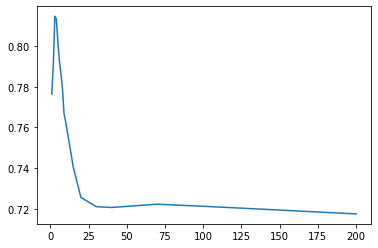

0.7718048230214106

In [235]:
X_train = new_X_train
y_train = new_y_train

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 70, 100, 200]
scores = []

for max_depth in max_depths:
    scores_local = []
    for i in range(5):
        # 10-fold CV
        kf = StratifiedKFold(n_splits = 10, shuffle = True)

    #     indices = list(kf.split(X_train, y_train))[0][0]
    #     print(np.unique(y_train[indices], return_counts=True))
    #     break

        model = DecisionTreeClassifier(max_depth = max_depth)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_train)
#         print(roc_auc_score(y_train, y_pred))
#         print(np.unique(y_pred, return_counts = True))

        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
        
        new_model = DecisionTreeClassifier(max_depth = max_depth)
        new_model.fit(X_train, y_train)
#         print(np.unique(new_model.predict(X_train), return_counts = True))
#         print(cv_scores)

#         scores_local.append(sum(cv_scores) / len(cv_scores))
        scores_local.append(np.mean(cv_scores))
    scores.append(np.mean(scores_local))
    
plt.plot(max_depths, scores)
plt.show()

max_value = max(scores)
index = scores.index(max_value)

model = DecisionTreeClassifier(max_depth = max_depths[index])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print(np.unique(y_pred, return_counts = True))
roc_auc_score(y_test, y_pred)

# grid_rf_class = GridSearchCV(
#     estimator = DecisionTreeClassifier(),
#     param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
#     scoring = 'roc_auc',
#     n_jobs = 3,
#     cv = 10,
#     refit = True,
#     return_train_score = True
# )

# grid_rf_class.fit(X_train, y_train)

# print(grid_rf_class.best_params_)

# y_pred = grid_rf_class.predict(X_train)

# print(np.unique(y_pred, return_counts = True))

# # roc_auc_score(y_test, y_pred)

In [229]:
from sklearn.utils import resample

df_majority = X_train[y_train == 0]
df_minority = X_train[y_train == 1]

df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_minority),    # to match majority class
                                 ) # reproducible results

new_X_train = np.concatenate([df_majority_downsampled, df_minority])
# print(df_majority_downsampled)
new_y_train = np.concatenate([np.zeros(len(df_majority_downsampled)), np.ones(len(df_minority))])

lg = DecisionTreeClassifier(min_samples_split = 300)
# lg = GradientBoostingClassifier(learning_rate = 0.1)
lg.fit(new_X_train, new_y_train)

print(np.unique(new_y_train, return_counts = True))

y_pred = lg.predict(new_X_train)
print(roc_auc_score(new_y_train, y_pred))
print(np.unique(y_pred, return_counts = True))

y_pred_test = lg.predict(X_test)

print(np.unique(y_pred_test, return_counts = True))
roc_auc_score(y_test, y_pred_test)

(array([0., 1.]), array([1326, 1326], dtype=int64))
0.7895927601809953
(array([0., 1.]), array([1074, 1578], dtype=int64))
(array([0., 1.]), array([5970, 4030], dtype=int64))


0.7739113633307481

In [202]:
# Python
# # Separate majority and minority classes
# df_majority = df[df.balance==0]
# df_minority = df[df.balance==1]
 
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=576,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled.balance.value_counts()
# # 1    576
# # 0    576
# # Name: balance, dtype: int64

NameError: name 'Python' is not defined